In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona.crs
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from folium.plugins import HeatMap
import folium
import branca.colormap as cm

# graph = ox.graph_from_place(place_name)
# fig, ax = ox.plot_graph(graph)
# plt.tight_layout()

In [ ]:
place_name = "Greece"
road_gr = ox.geometries.geometries_from_place(place_name,  tags = {"highway":["primary", "secondary"]})
road_gr2 = ox.geometries.geometries_from_place(place_name,  tags = {"highway":["residential", "pedestrian", "service"]})

In [ ]:
# road_gr.to_json()
# road_gr2.to_json()

prim = np.sum(georoad_gr_pr.geometry.length)
sec = np.sum(georoad_gr_sc.geometry.length)
(sec)*1000

In [ ]:
gr = gpd.read_file('greece.json')
gr = gpd.GeoDataFrame(gr, geometry = 'geometry', crs=crs)
greece = gpd.read_file("periphereies.shp")
greece = greece.to_crs(epsg=4326)
greece = greece.geometry

crs = fiona.crs.from_epsg(2100)
geo_road_gr = gpd.GeoDataFrame(road_gr, geometry = 'geometry', crs=crs)
georoad_gr_pr = geo_road_gr[geo_road_gr['highway'].str.contains('primary', na=False)]
georoad_gr_sc = geo_road_gr[geo_road_gr['highway'].str.contains('secondary', na=False)]

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkred', linewidth=1.5, label = 'Primary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'navy', linewidth=1, label = 'Secondary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
plt.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
georoad_gr_pr.plot(ax=ax, color = 'darkred', linewidth=1.5, zorder = 10)
georoad_gr_sc.plot(ax=ax, color = 'navy', linewidth=1, zorder = 9)
ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.8, 38.5, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
plt.title('Road Network of Greece', fontsize = 20, **hfont)
plt.savefig('link3.jpg', format='jpg', dpi=1200)

In [ ]:
place_name = "Περιφερειακή Ενότητα Θεσσαλονίκης"

hiking = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})
football = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
# building = ox.geometries.geometries_from_place(place_name,  tags = {"building":True})

# geo_build = gpd.GeoDataFrame(building, geometry = 'geometry', crs=crs)
# geo_build = geo_build[geo_build['geometry'].type != 'Point']

geo_road = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']
# geo_road = geo_road[geo_road['highway'].str.contains('primary|secondary|residential|pedestrian|service', na=False)]
geo_cycl = geo_road[geo_road['highway'].str.contains('cycleway', na=False)]


# geo_hiking = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
# geo_hiking = geo_hiking[['highway', 'geometry']]
# geo_hiking2 = geo_hiking[geo_hiking['highway'].str.contains('footway|path', na=False)]

football2 = gpd.GeoDataFrame(football, geometry = 'geometry', crs=crs)
football2 = football2[['leisure','name', 'sport', 'geometry']]
football2 = football2[football2['geometry'].type == 'Polygon']
football2 = football2[football2['sport'].str.contains('soccer|stadium|pitch|stadium', na=False)]

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(22.9, 40.65, color = 'darkgreen', marker = 's', label = 'Football Field')
ax.plot(22.9, 40.65, color = 'black', ls = '-.', label = 'Region of Thessaloniki')
ax.plot(22.9, 40.65, color = 'gray', label = 'Road Network')
ax.plot(22.9, 40.65, color = 'darkred', label = 'Cycling Network')
ax.text(22.92, 40.615, 'Thermaikos\nGulf', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center')
plt.legend().set_zorder(99)

thess2.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
thess2.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
football2.plot(ax=ax, facecolor='darkgreen', zorder = 11)
geo_road2.plot(ax=ax, color = "grey", edgecolor='grey', alpha = 0.5, zorder = 9)
geo_cycl.plot(ax=ax, color = 'darkred', zorder = 9)
# geo_build.plot(ax=ax, facecolor='#b8baba', zorder = 10)

ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")

# ax.set_xlim(22.88, 23)
# ax.set_ylim(40.57, 40.69)
ax.set_xlim(22.888, 22.999)
ax.set_ylim(40.585, 40.654)
plt.title('Football fields & Cycling routes \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link2.jpg')

In [93]:
crs = fiona.crs.from_epsg(2100)

leisure = ox.geometries.geometries_from_place(place_name,  tags = {"amenity":True})
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)

b = leisure[leisure['amenity'].str.contains('bar|cafe|nightclub|pub|restaurant', na=False)]
geo_bars = gpd.GeoDataFrame(b, geometry = 'geometry', crs=crs)
geo_bars = geo_bars[geo_bars['geometry'].type == 'Point']
bars = geo_bars[['geometry']]
colormap = cm.LinearColormap(colors=['blue', 'lightgreen', 'red'], index=[1, 3, 5], vmin=0, vmax=5)

stations = pd.DataFrame()
stations['latitude'] = bars.geometry.y
stations['longitude'] = bars.geometry.x

style2 = {'fillColor': '#00000000', 'color': '#000000', 'weight': '1',  'dashArray': ''}

for_map = folium.Map(location=[stations.latitude.values.mean(), stations.longitude.values.mean()], zoom_start=12)
hm_wide = HeatMap(
    list(zip(stations.latitude.values, stations.longitude.values)),
    min_opacity=0.30,
    radius=15, 
    blur=8)
folium.GeoJson(thess2['geometry'], style_function=lambda x:style2).add_to(for_map)
for_map.add_child(hm_wide)

for_map.add_child(colormap)

for_map

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


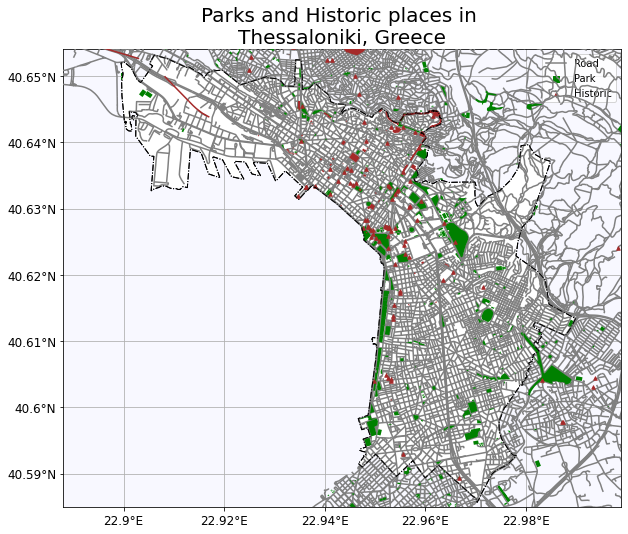

In [92]:
leisure = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
leisure = leisure[['leisure','name', 'geometry']]
leisure = leisure[leisure['geometry'].type == 'Polygon']
historic = ox.geometries.geometries_from_place(place_name,  tags = {"historic":True})
historic = historic[['historic','name', 'geometry']]
roads = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})

crs = fiona.crs.from_epsg(2100)
geo_parks = gpd.GeoDataFrame(leisure, geometry = 'geometry', crs=crs)
geo_hist = gpd.GeoDataFrame(historic, geometry = 'geometry', crs=crs)
geo_road = gpd.GeoDataFrame(roads, geometry = 'geometry', crs=crs)
# geo_sea = gpd.GeoDataFrame(sea, geometry = 'geometry', crs=crs)

geo_parks2 = geo_parks[geo_parks['leisure'].str.contains('park|garden|playground|dog_park|recreation_ground', na=False)]
geo_hist2 = geo_hist[geo_hist['geometry'].type == 'Polygon']
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']

thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)

grc = gpd.read_file('greece_coast.json')
grc2 = gpd.GeoDataFrame(grc, geometry = 'geometry', crs=crs)

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(22.9, 40.65, color = 'green', marker = 's',label = 'Park')
ax.scatter(22.9, 40.65, color = 'brown', marker = '^', s = 12, label = 'Historic', )
ax.plot([22.9,22.91], [40.65, 40.66], color = 'grey', label = 'Road')
plt.legend()

thess2.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
thess2.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
geo_parks.plot(ax=ax, facecolor='green', zorder = 10)
geo_hist.plot(ax=ax, facecolor='brown', marker = '^', markersize = 12, color = 'brown', zorder = 10)
geo_road2.plot(ax=ax, facecolor='grey', color = 'grey', zorder = 9)
# water.plot(ax=ax, facecolor='blue', color = 'blue', zorder = 9)
ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
ax.set_xlim(22.888, 22.999)
ax.set_ylim(40.585, 40.654)
plt.title('Parks and Historic places in \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link.jpg')